# Analise de sentimentos - primeiro exercício de classificação


Exercício de análise de sentimentos utilizando dataset de comentários do IMDB.

## Importação dos módulos

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


# Importando Dataset do IMDB 

In [ ]:
!wget -nc http://files.fast.ai/data/examples/imdb_sample.tgz
!tar -xzf imdb_sample.tgz

--2020-03-18 21:16:01--  http://files.fast.ai/data/examples/imdb_sample.tgz
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 571827 (558K) [application/x-gtar-compressed]
Saving to: ‘imdb_sample.tgz’

imdb_sample.tgz     100%[===================>] 558.42K  1.55MB/s    in 0.4s    

2020-03-18 21:16:02 (1.55 MB/s) - ‘imdb_sample.tgz’ saved [571827/571827]



In [ ]:
df = pd.read_csv('imdb_sample/texts.csv')
df.shape

(1000, 3)

In [ ]:
corpus_imdb = df['text'].values
label = df['label'].values

pandas.core.series.Series

# Utilizando CountVectorizer para construir matriz de features

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus_imdb)
X.toarray().shape

(1000, 18668)

In [ ]:
n_words = len(vectorizer.get_feature_names())

In [ ]:
X = X.toarray()
Y = np.where(label == 'positive', 1, 0)
Y

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((750, 18668), (250, 18668), (750,), (250,))

In [ ]:
X_train, X_test, Y_train, Y_test= torch.from_numpy(X_train), torch.from_numpy(X_test), torch.from_numpy(Y_train), torch.from_numpy(Y_test)
X_train, X_test, Y_train, Y_test = X_train.type(torch.float32), X_test.type(torch.float32), Y_train.type(torch.long), Y_test.type(torch.long) 



  # Criação dos modelos de redes neurais
Foram criados 3 modelos de rede neural com as seguintes arquiteturas:
* Uma camada escondida com 1000 neurônios
* 2 camadas escondidas com 1000 e 100 neurônios, nessa ordem.
* 3 camadas escondidas com 1000, 500 e 50 neurônios, nessa ordem.

Todas elas utilizam ReLu como função de ativação e uma função softmax no final da rede. 

In [ ]:
class ModelNN1(torch.nn.Module):
    def __init__(self):
        super(ModelNN1, self).__init__()
        self.layer1 = torch.nn.Linear(in_features=n_words, out_features = 1000)   
        self.layer2 = torch.nn.Linear(in_features=1000, out_features=2)


    def forward(self, x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = torch.nn.functional.softmax(x, dim=1)
        return x

class ModelNN2(torch.nn.Module):
    def __init__(self):
        super(ModelNN2, self).__init__()
        self.layer1 = torch.nn.Linear(in_features=n_words, out_features=1000)   
        self.layer2 = torch.nn.Linear(in_features=1000, out_features=100)
        self.layer3 = torch.nn.Linear(in_features=100, out_features=2)   

    def forward(self, x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = torch.nn.functional.softmax(x, dim=1)
        return x

class ModelNN3(torch.nn.Module):
    def __init__(self):
        super(ModelNN3, self).__init__()
        self.layer1 = torch.nn.Linear(in_features=n_words, out_features= 1000)   
        self.layer2 = torch.nn.Linear(in_features=1000, out_features=500)
        self.layer3 = torch.nn.Linear(in_features=500, out_features=50)
        self.layer4 = torch.nn.Linear(in_features=50, out_features=2)   

    def forward(self, x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.relu(x)
        x = self.layer4(x)
        x = torch.nn.functional.softmax(x, dim=1)
        return x

In [ ]:
learning_rates = [0.5, 0.1, 0.01, 0.001]
epochs = range(100)
list_loss_m1 = []
list_loss_m2 = []
list_loss_m3 = []

model_val_lr = {}
model_val_losses = {}
model_val_minloss = {1:9999, 2:9999, 3:9999}


In [ ]:
model1 = ModelNN1()
model2 = ModelNN2()
model3 = ModelNN3()

87

## Teste utilizando 4 valores diferentes de learning rate para cada modelo

0.5
0
10
20
30
40
50
60
70
80
90
0.1
0
10
20
30
40
50
60
70
80
90
0.01
0
10
20
30
40
50
60
70
80
90
0.001
0
10
20
30
40
50
60
70
80
90


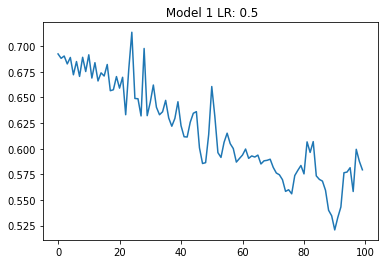

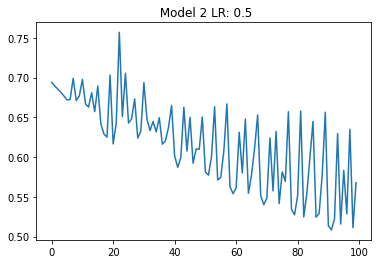

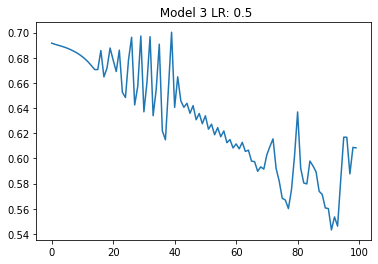

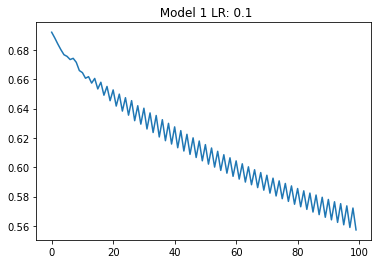

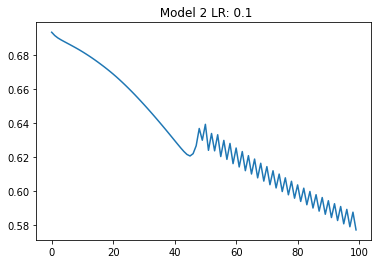

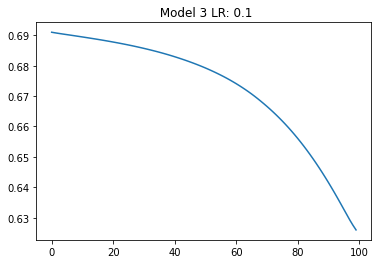

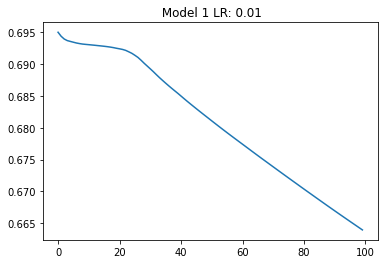

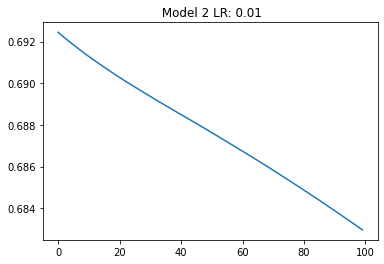

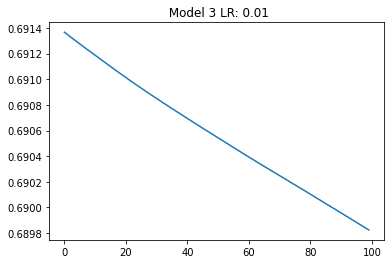

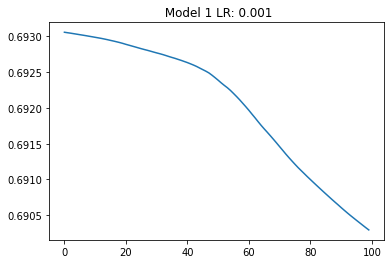

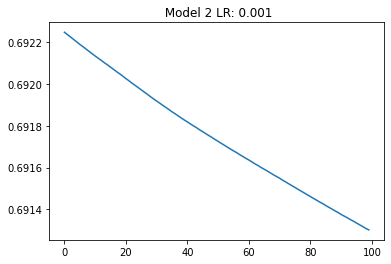

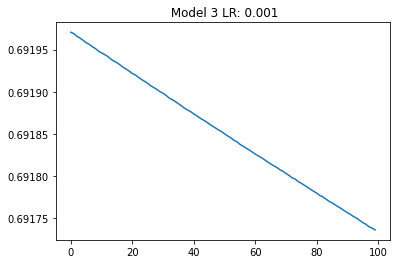

In [ ]:
loss_func = torch.nn.CrossEntropyLoss()

for LR in learning_rates:
  print(LR)
  model1 = ModelNN1()
  model2 = ModelNN2()
  model3 = ModelNN3()
  opt1 = torch.optim.SGD(model1.parameters(), lr=LR)
  opt2 = torch.optim.SGD(model2.parameters(), lr=LR)
  opt3 = torch.optim.SGD(model3.parameters(), lr=LR)

  list_loss_m1 = []
  list_loss_m2 = []
  list_loss_m3 = []

  for e in epochs:
    if (e % 10 == 0):
      print(e)
    y_pred1 = model1(X_train)             # prediction for every sample
    y_pred2 = model2(X_train)
    y_pred3 = model3(X_train)
    # print(y_pred1.shape)
    loss1 = loss_func(y_pred1, Y_train)   # compute loss for every prediction
    loss2 = loss_func(y_pred2, Y_train)
    loss3 = loss_func(y_pred3, Y_train)
    
    opt1.zero_grad()                    # clear gradients for next train
    opt2.zero_grad()
    opt3.zero_grad()
    
    loss1.backward()                    # backpropagation, compute gradients
    loss2.backward()
    loss3.backward()
    
    opt1.step()                         # apply gradients
    opt2.step()
    opt3.step()
    
    list_loss_m1.append(loss1.item())       # loss recoder
    list_loss_m2.append(loss2.item())
    list_loss_m3.append(loss3.item())
  
  if min(list_loss_m1)<model_val_minloss[1]:
    model_val_minloss[1]=min(list_loss_m1)
    model_val_losses[1] = list_loss_m1
    model_val_lr[1] = LR
  if min(list_loss_m2)<model_val_minloss[2]:
    model_val_minloss[2]=min(list_loss_m2)
    model_val_losses[2] = list_loss_m2
    model_val_lr[2] = LR
  if min(list_loss_m3)<model_val_minloss[3]:
    model_val_minloss[3]=min(list_loss_m3)
    model_val_losses[3] = list_loss_m3
    model_val_lr[3] = LR
  plt.figure()
  plt.title(' Model 1 LR: {}'.format(LR))
  plt.plot(list_loss_m1)
  
  plt.figure()
  plt.title(' Model 2 LR: {}'.format(LR))
  plt.plot(list_loss_m2)
  plt.figure()
  plt.title(' Model 3 LR: {}'.format(LR))
  plt.plot(list_loss_m3)


    

In [ ]:
model_val_lr

{1: 0.5, 2: 0.5, 3: 0.5}

In [ ]:
  model1 = ModelNN1()
  model2 = ModelNN2()
  model3 = ModelNN3()
  opt1 = torch.optim.SGD(model1.parameters(), lr=0.5)
  opt2 = torch.optim.SGD(model2.parameters(), lr=0.5)
  opt3 = torch.optim.SGD(model3.parameters(), lr=0.5)

In [ ]:

for e in epochs:
    if (e % 10 == 0):
      print("Época {}".format(e))
    y_pred1 = model1(X_train)             # prediction for every sample
    y_pred2 = model2(X_train)
    y_pred3 = model3(X_train)
    # print(y_pred1.shape)
    loss1 = loss_func(y_pred1, Y_train)   # compute loss for every prediction
    loss2 = loss_func(y_pred2, Y_train)
    loss3 = loss_func(y_pred3, Y_train)
    
    opt1.zero_grad()                    # clear gradients for next train
    opt2.zero_grad()
    opt3.zero_grad()
    
    loss1.backward()                    # backpropagation, compute gradients
    loss2.backward()
    loss3.backward()
    
    opt1.step()                         # apply gradients
    opt2.step()
    opt3.step()
    
    list_loss_m1.append(loss1.item())       # loss recoder
    list_loss_m2.append(loss2.item())
    list_loss_m3.append(loss3.item())

0
10
20
30
40
50
60
70
80
90


In [ ]:
y_logits1 = model1(X_test)
y_logits2 = model2(X_test)
y_logits3 = model3(X_test)
Y_pred1 = torch.argmax(y_logits1, dim=1)
Y_pred2 = torch.argmax(y_logits2, dim=1)
Y_pred3 = torch.argmax(y_logits3, dim=1)
acc1 = (Y_pred1 == Y_test).type(torch.float).mean()
acc2 = (Y_pred2 == Y_test).type(torch.float).mean()
acc3 = (Y_pred3 == Y_test).type(torch.float).mean()
print("Acuracia no conjunto de teste:\nModel 1: {}\nModel 2: {}\nModel 3: {}".format(acc1,acc2,acc3))

Acuracia no conjunto de teste:
Model 1: 0.6759999990463257
Model 2: 0.6399999856948853
Model 3: 0.7120000123977661


Pudemos ver que o modelo 3, com o maior número de camadas escondidas, teve o melhor desempenho no conjunto de teste.